## <font color="Greenyellow">Trabajo de Fin Master 2: Modelos base</font>
<a id="item0"></a> 

### <font color="Greenyellow">Indice</font>

* [1. Inicializacion del notebook](#item1)
* [2. ETL](#item2)
* [3. Modelos base](#item3)


***
<a id="item1"></a>
### <font color="Greenyellow">1. Inicializacion del notebook</font>

#### <font color="Greenyellow">1.1. Importacion de librerias</font>

In [1]:
# Analisis y transformacion de datos
import pandas as pd
import numpy as np
# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
# Base de datos
import sqlite3
# Funciones propias en carpeta 'funciones
import funciones.funciones as funciones
# funciones machine learning
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_auc_score 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler
# Deep Learning
import torch
from torch.utils.data import DataLoader, TensorDataset

#### <font color="Greenyellow">1.2. Parametros del notebook</font>

In [2]:
carpeta_base_datos = 'bbdd'
nombre_bbdd        = 'base_datos_tfm.db'
semilla = 12345
pct_test=0.20

***
<a id="item2"></a>
### <font color="Greenyellow">2. ETL</font>
[Volver al indice](#item0)

In [3]:
# importamos los datos
df = funciones.extraer_datos_fraude(carpeta_base_datos=carpeta_base_datos)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [4]:
# Datos para modelos de detección de anomalías
# Dividimos los datos en train y test teniendo en cuenta:
# - Datos de train tienen que ser solo datos normales
# - Datos de test tienen que tener tanto datos normales como anómalos
X_train_normal, X_eval, y_true = funciones.preparar_datos_anomalias(df, pct_test=pct_test, semilla=semilla)

print(f"Datos de entrenamiento para detección de anomalías: {X_train_normal.shape}")
print(f"Datos de test: {X_eval.shape}, Datos anómalos en test: {y_true.sum()}, Datos normales en test: {len(y_true) - y_true.sum()}")

# Datos para modelos supervisados
X_train, X_test, y_train, y_test = funciones.preparar_datos(df, n_columnas_x=29, pct_test=pct_test, semilla=semilla)
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

Datos de entrenamiento para detección de anomalías: (227452, 29)
Datos de test: (57355, 29), Datos anómalos en test: 492, Datos normales en test: 56863
X_train shape: (227845, 29), y_train shape: (227845,)
X_test shape: (56962, 29), y_test shape: (56962,)


In [5]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
229298,-1.831394,1.107141,-1.204424,-1.226820,1.028445,-0.760374,1.323551,-0.357271,1.115512,2.062144,...,0.726618,-0.177495,0.872423,-0.227237,-1.826174,0.271514,0.313205,2.309268,1.237288,0.000300
265523,1.848515,0.196144,-0.032262,2.877412,0.047466,0.391277,-0.177296,0.054035,-0.277311,1.114453,...,-0.296210,0.137337,0.845369,0.226368,1.955058,0.200332,0.156773,0.010514,-0.096330,0.000378
203519,-1.053561,0.190965,-1.004245,0.498794,1.593853,-0.926626,1.057261,-0.368972,-0.145625,-0.498147,...,-0.541510,0.165214,0.772797,-0.019675,0.816888,-1.482848,-1.673466,-0.526134,2.332556,0.002702
243603,-6.401023,2.233112,-1.327982,-1.842580,-2.295182,-0.120515,-2.404561,2.517392,1.893599,2.680617,...,0.796774,-0.235849,0.765483,0.708858,-1.292930,1.107814,-0.681156,-1.536555,-2.520797,0.000039
146126,1.992540,-0.128910,-0.295624,0.213794,-0.177720,-0.107917,-0.345424,-0.034216,0.966190,-0.202261,...,-0.137683,-0.233367,-0.423150,0.610440,0.983131,-0.691763,-1.348371,0.104332,-0.067163,0.000340


***
<a id="item3"></a>
### <font color="Greenyellow">3. Modelos base</font>
[Volver al indice](#item0)

### <font color="Greenyellow">3.1. Modelos de Detección de Anomalias</font>

#### <font color="Greenyellow">3.1.1. Isolation forest</font>

#### <font color="Greenyellow">Modelo</font>

In [6]:
# 1. Isolation Forest como feature engineering
valor_contamination = 0.017
model_iforest = IsolationForest(n_estimators=10, 
                                contamination=valor_contamination, 
                                random_state=semilla, 
                                n_jobs=-1)

# 1. Entrenamos el modelo con los datos normales
print("1. Entrenando Isolation Forest con X_train_normal...")
model_iforest.fit(X_train_normal)
print("... entrenamiento completado.")

1. Entrenando Isolation Forest con X_train_normal...
... entrenamiento completado.


#### <font color="Greenyellow">Evaluación y scoring de anomalia</font>

In [7]:
# 2. Obtenemos la medida de anomalia y convertimos a columna
X_train_iforest_score = model_iforest.decision_function(X_train).reshape(-1, 1)
X_test_iforest_score = model_iforest.decision_function(X_test).reshape(-1, 1)

# 3. Agregamos la nueva feature al dataset original (-0.5 anomalia, +0.5 normal)
X_train_m1 = pd.DataFrame(np.hstack((X_train.values, X_train_iforest_score)), columns=list(X_train.columns) + ['iso_forest_score'])
X_test_m1 = pd.DataFrame(np.hstack((X_test.values, X_test_iforest_score)), columns=list(X_test.columns) + ['iso_forest_score'])

In [8]:
# Generamos predicciones mediante el conjunto X_eval (-1 anomalia, 1 normal)
y_pred_iforest = model_iforest.predict(X_eval)

# Transformamos las predicciones de la siguiente manera:
# -1 (anomalia) -> 1 (fraude)
#  1 (normal)  -> 0 (no fraude)
y_pred_iforest_ajustado = np.where(y_pred_iforest == -1, 1, 0)

# 1. Accuracy
accuracy_iforest = accuracy_score(y_true, y_pred_iforest_ajustado)
print(f"Accuracy del Isolation Forest: {accuracy_iforest:.4f}")
# 2. Matriz de Confusión
conf_matrix_iforest = confusion_matrix(y_true, y_pred_iforest_ajustado)
print("\nMatriz de Confusión:")
print(conf_matrix_iforest)
# 3. Informe de Clasificación
# Target_names: 0 -> Normal, 1 -> Fraude
print("\nInforme de Clasificación:")
print(classification_report(y_true, y_pred_iforest_ajustado, target_names=['Normal', 'Fraude']))
# 4. ROC AUC
y_scores_iforest = model_iforest.decision_function(X_eval)
roc_auc_iforest = roc_auc_score(y_true, -y_scores_iforest)
print(f"\nROC AUC del Isolation Forest: {roc_auc_iforest:.4f}")

Accuracy del Isolation Forest: 0.9783

Matriz de Confusión:
[[55901   962]
 [  281   211]]

Informe de Clasificación:
              precision    recall  f1-score   support

      Normal       0.99      0.98      0.99     56863
      Fraude       0.18      0.43      0.25       492

    accuracy                           0.98     57355
   macro avg       0.59      0.71      0.62     57355
weighted avg       0.99      0.98      0.98     57355


ROC AUC del Isolation Forest: 0.9119


#### <font color="Greenyellow">3.1.2. SVM One class</font>

#### <font color="Greenyellow">Modelo</font>

In [9]:
# 1. SVM One class como feature engineering
model_svm = OneClassSVM(nu=valor_contamination, kernel="rbf", gamma='scale')
# 1. Entrenamos el modelo con los datos normales
print("1. Entrenando SVM One Class con X_train_normal...")
model_svm.fit(X_train_normal)
print("... entrenamiento completado.")

1. Entrenando SVM One Class con X_train_normal...
... entrenamiento completado.


#### <font color="Greenyellow">Evaluación y scoring de anomalia</font>

In [10]:
# 2. Obtenemos la medida de anomalia y convertimos a columna
X_train_svm_score = model_svm.decision_function(X_train).reshape(-1, 1)
X_test_svm_score = model_svm.decision_function(X_test).reshape(-1, 1)
# 3. Agregamos la nueva feature a X_train_m1 y X_test_m1 (-inf anomalia, +inf normal)
X_train_m2 = pd.DataFrame(np.hstack((X_train_m1.values, X_train_svm_score)), columns=list(X_train_m1.columns) + ['svm_score'])
X_test_m2 = pd.DataFrame(np.hstack((X_test_m1.values, X_test_svm_score)), columns=list(X_test_m1.columns) + ['svm_score'])

In [11]:
# Generamos predicciones mediante el conjunto X_eval
y_pred_svm = model_svm.predict(X_eval)

# Transformamos las predicciones de la siguiente manera:
# -1 (anomalia) -> 1 (fraude)
#  1 (normal)  -> 0 (no fraude)
y_pred_svm_ajustado = np.where(y_pred_svm == -1, 1, 0)

# 1. Accuracy
accuracy_svm = accuracy_score(y_true, y_pred_svm_ajustado)
print(f"Accuracy del One-Class SVM: {accuracy_svm:.4f}")

# 2. Matriz de Confusión
# Las etiquetas son: 0 (Normal), 1 (Fraude)
conf_matrix_svm = confusion_matrix(y_true, y_pred_svm_ajustado)
print("\nMatriz de Confusión:")
print(conf_matrix_svm)
# 3. Informe de Clasificación
print("\nInforme de Clasificación:")
print(classification_report(y_true, y_pred_svm_ajustado, target_names=['Normal', 'Fraude']))
# 4. ROC AUC
y_scores_svm = model_svm.decision_function(X_eval)
roc_auc_svm = roc_auc_score(y_true, -y_scores_svm)
print(f"\nROC AUC del One-Class SVM: {roc_auc_svm:.4f}")

Accuracy del One-Class SVM: 0.9814

Matriz de Confusión:
[[55877   986]
 [   79   413]]

Informe de Clasificación:
              precision    recall  f1-score   support

      Normal       1.00      0.98      0.99     56863
      Fraude       0.30      0.84      0.44       492

    accuracy                           0.98     57355
   macro avg       0.65      0.91      0.71     57355
weighted avg       0.99      0.98      0.99     57355


ROC AUC del One-Class SVM: 0.9429


#### <font color="Greenyellow">3.1.3. Autoencoder</font>

#### <font color="Greenyellow">Modelo</font>

In [12]:
# Preparamos los datos normales para el PyTorch DataLoader
X_np_normal = X_train_normal.values if isinstance(X_train_normal, pd.DataFrame) else X_train_normal
X_tensor_normal = torch.tensor(X_np_normal, dtype=torch.float32)
dataset_normal = TensorDataset(X_tensor_normal)
dataloader_normal = DataLoader(dataset_normal, batch_size=128, shuffle=True)

# Instanciamos el modelo
input_dimension = X_train_normal.shape[1] 
model_ae_funcional = funciones.autoencoder(input_dimension, neuronas_capa1=128, neuronas_capa2=64, neuronas_capa3=16)
# Entrenamos el modelo
print("\n1. Entrenando Autoencoder...")
historial_perdida = funciones.entrenar_autoencoder(model_ae_funcional, dataloader_normal, epochs=15, learning_rate=0.001) 
print("... entrenamiento completado.")


1. Entrenando Autoencoder...
Epoca 1/15, Perdida: 0.229975
Epoca 2/15, Perdida: 0.080706
Epoca 3/15, Perdida: 0.060557
Epoca 4/15, Perdida: 0.048821
Epoca 5/15, Perdida: 0.042343
Epoca 6/15, Perdida: 0.041947
Epoca 7/15, Perdida: 0.036840
Epoca 8/15, Perdida: 0.034770
Epoca 9/15, Perdida: 0.032872
Epoca 10/15, Perdida: 0.031496
Epoca 11/15, Perdida: 0.030067
Epoca 12/15, Perdida: 0.029040
Epoca 13/15, Perdida: 0.026638
Epoca 14/15, Perdida: 0.026423
Epoca 15/15, Perdida: 0.024762
... entrenamiento completado.


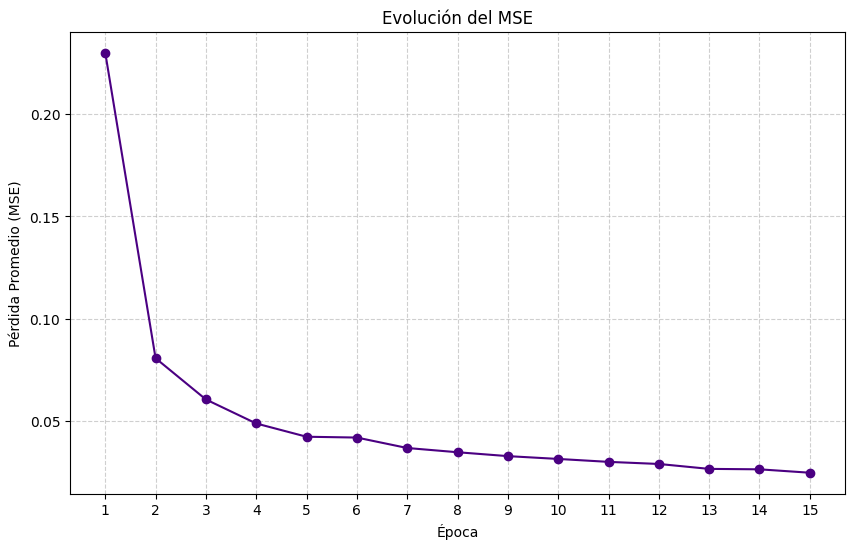

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(historial_perdida) + 1), historial_perdida, marker='o', linestyle='-', color='indigo')
plt.title('Evolución del MSE')
plt.xlabel('Época')
plt.ylabel('Pérdida Promedio (MSE)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(1, len(historial_perdida) + 1))
plt.show()

#### <font color="Greenyellow">Evaluación y scoring de anomalia</font>

In [14]:

# Obtenemos el error de reconstruccion como grado de anomalia (ae_score)
print("\n2. Calculando errores de reconstruccion...")
X_train_ae_score = funciones.calcular_error_reconstruccion(model_ae_funcional, X_train)
X_test_ae_score = funciones.calcular_error_reconstruccion(model_ae_funcional, X_test)
print("... calculo completado.")

# Agregamos nueva feature al dataset extendido (0 normal, +inf anomalia)
X_train_m3 = pd.DataFrame(np.hstack((X_train_m2.values, X_train_ae_score)), columns=list(X_train_m2.columns) + ['ae_score'])
X_test_m3 = pd.DataFrame(np.hstack((X_test_m2.values, X_test_ae_score)), columns=list(X_test_m2.columns) + ['ae_score'])

print(f"\nNueva forma de X_train (m3): {X_train_m3.shape}")
print(f"Nuevas columnas añadidas: ['ae_score']")


2. Calculando errores de reconstruccion...
... calculo completado.

Nueva forma de X_train (m3): (227845, 32)
Nuevas columnas añadidas: ['ae_score']


In [15]:
# Calculamos el error de reconstrucciónpara el conjunto de X_eval
X_eval_ae_score = funciones.calcular_error_reconstruccion(model_ae_funcional, X_eval)
y_scores_ae = X_eval_ae_score.reshape(-1)

# Definimos el umbral como el percentil 97
valor_contamination = 0.017
umbral_ae = np.percentile(y_scores_ae, 100 * (1 - valor_contamination))
print(f"Umbral de clasificación (Percentil {100 * (1 - valor_contamination):.2f}): {umbral_ae:.4f}")
y_pred_ae_ajustado = np.where(y_scores_ae > umbral_ae, 1, 0)

# 1. Accuracy
accuracy_ae = accuracy_score(y_true, y_pred_ae_ajustado)
print(f"\nAccuracy del Autoencoder (con umbral): {accuracy_ae:.4f}")
# 2. Matriz de Confusión
conf_matrix_ae = confusion_matrix(y_true, y_pred_ae_ajustado)
print("\nMatriz de Confusión (Filas: Real, Columnas: Predicción):")
print(conf_matrix_ae)
# 3. Informe de Clasificación
print("\nInforme de Clasificación:")
print(classification_report(y_true, y_pred_ae_ajustado, target_names=['Normal', 'Fraude']))
# 4. ROC AUC
roc_auc_ae = roc_auc_score(y_true, y_scores_ae)
print(f"\nROC AUC del Autoencoder: {roc_auc_ae:.4f}")

Umbral de clasificación (Percentil 98.30): 0.3228

Accuracy del Autoencoder (con umbral): 0.9882

Matriz de Confusión (Filas: Real, Columnas: Predicción):
[[56284   579]
 [   95   397]]

Informe de Clasificación:
              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99     56863
      Fraude       0.41      0.81      0.54       492

    accuracy                           0.99     57355
   macro avg       0.70      0.90      0.77     57355
weighted avg       0.99      0.99      0.99     57355


ROC AUC del Autoencoder: 0.9512


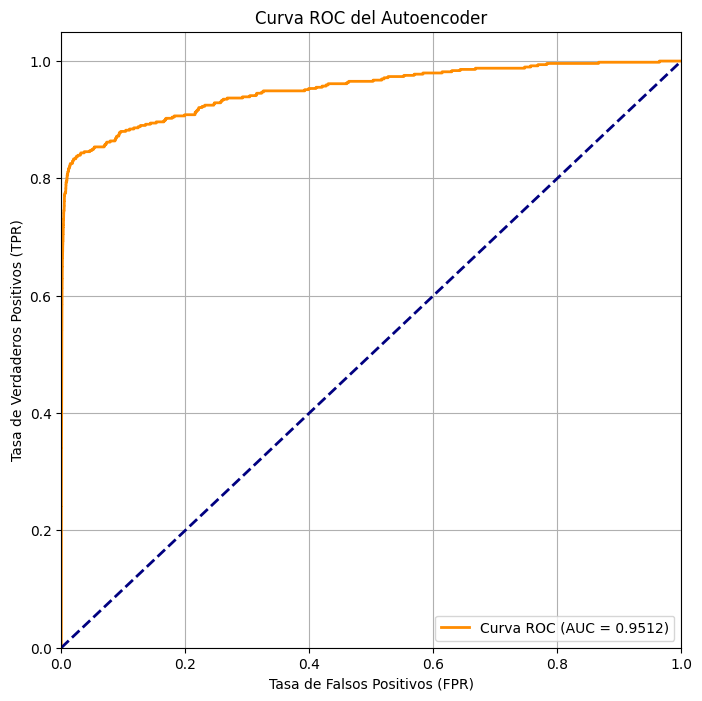

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_true, y_scores_ae)
roc_auc = roc_auc_score(y_true, y_scores_ae)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC del Autoencoder')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### <font color="Greenyellow">3.2. Feature Engineering</font>

#### <font color="Greenyellow">Preprocesado</font>

In [ ]:
# Tenemos X_train_m3, X_test_m3, y_train, y_test. Concatenamos estas matrices para tener el dataset completo con las nuevas features
df = pd.concat([X_train_m3, X_test_m3], axis=0).reset_index(drop=True)
df['Class'] = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

#### <font color="Greenyellow">Normalización de las nuevas features</font>

In [18]:
# En df, invertimos los signos de iso_forest_score y svm_score para que un valor alto indique mayor probabilidad de anomalia 
df['iso_forest_score'] = -df['iso_forest_score']
df['svm_score'] = -df['svm_score']

In [19]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,Amount,iso_forest_score,svm_score,ae_score,Class
0,-1.831394,1.107141,-1.204424,-1.226820,1.028445,-0.760374,1.323551,-0.357271,1.115512,2.062144,...,-1.826174,0.271514,0.313205,2.309268,1.237288,0.000300,-0.173932,-10.794135,0.015954,0
1,1.848515,0.196144,-0.032262,2.877412,0.047466,0.391277,-0.177296,0.054035,-0.277311,1.114453,...,1.955058,0.200332,0.156773,0.010514,-0.096330,0.000378,-0.162380,-6.652499,0.003609,0
2,-1.053561,0.190965,-1.004245,0.498794,1.593853,-0.926626,1.057261,-0.368972,-0.145625,-0.498147,...,0.816888,-1.482848,-1.673466,-0.526134,2.332556,0.002702,-0.133014,-18.434699,0.079065,0
3,-6.401023,2.233112,-1.327982,-1.842580,-2.295182,-0.120515,-2.404561,2.517392,1.893599,2.680617,...,-1.292930,1.107814,-0.681156,-1.536555,-2.520797,0.000039,-0.005764,1.632719,0.195230,0
4,1.992540,-0.128910,-0.295624,0.213794,-0.177720,-0.107917,-0.345424,-0.034216,0.966190,-0.202261,...,0.983131,-0.691763,-1.348371,0.104332,-0.067163,0.000340,-0.201228,-13.203060,0.001719,0


In [20]:
# En df, normalizamos las nuevas features para que se encuentren en valores entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))
df[['iso_forest_score', 'svm_score', 'ae_score']] = scaler.fit_transform(df[['iso_forest_score', 'svm_score', 'ae_score']])

In [21]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,Amount,iso_forest_score,svm_score,ae_score,Class
0,-1.831394,1.107141,-1.204424,-1.226820,1.028445,-0.760374,1.323551,-0.357271,1.115512,2.062144,...,-1.826174,0.271514,0.313205,2.309268,1.237288,0.000300,0.165643,0.494177,0.000118,0
1,1.848515,0.196144,-0.032262,2.877412,0.047466,0.391277,-0.177296,0.054035,-0.277311,1.114453,...,1.955058,0.200332,0.156773,0.010514,-0.096330,0.000378,0.193137,0.576759,0.000022,0
2,-1.053561,0.190965,-1.004245,0.498794,1.593853,-0.926626,1.057261,-0.368972,-0.145625,-0.498147,...,0.816888,-1.482848,-1.673466,-0.526134,2.332556,0.002702,0.263028,0.341830,0.000609,0
3,-6.401023,2.233112,-1.327982,-1.842580,-2.295182,-0.120515,-2.404561,2.517392,1.893599,2.680617,...,-1.292930,1.107814,-0.681156,-1.536555,-2.520797,0.000039,0.565879,0.741960,0.001513,0
4,1.992540,-0.128910,-0.295624,0.213794,-0.177720,-0.107917,-0.345424,-0.034216,0.966190,-0.202261,...,0.983131,-0.691763,-1.348371,0.104332,-0.067163,0.000340,0.100679,0.446145,0.000008,0


#### <font color="Greenyellow">Guardamos resultado en base de datos</font>

In [ ]:
#! Hacemos drop de iso_forest_score
df = df.drop(columns=['iso_forest_score'])
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,svm_score,ae_score,Class
0,-1.831394,1.107141,-1.204424,-1.226820,1.028445,-0.760374,1.323551,-0.357271,1.115512,2.062144,...,-0.227237,-1.826174,0.271514,0.313205,2.309268,1.237288,0.000300,0.494177,0.000118,0
1,1.848515,0.196144,-0.032262,2.877412,0.047466,0.391277,-0.177296,0.054035,-0.277311,1.114453,...,0.226368,1.955058,0.200332,0.156773,0.010514,-0.096330,0.000378,0.576759,0.000022,0
2,-1.053561,0.190965,-1.004245,0.498794,1.593853,-0.926626,1.057261,-0.368972,-0.145625,-0.498147,...,-0.019675,0.816888,-1.482848,-1.673466,-0.526134,2.332556,0.002702,0.341830,0.000609,0
3,-6.401023,2.233112,-1.327982,-1.842580,-2.295182,-0.120515,-2.404561,2.517392,1.893599,2.680617,...,0.708858,-1.292930,1.107814,-0.681156,-1.536555,-2.520797,0.000039,0.741960,0.001513,0
4,1.992540,-0.128910,-0.295624,0.213794,-0.177720,-0.107917,-0.345424,-0.034216,0.966190,-0.202261,...,0.610440,0.983131,-0.691763,-1.348371,0.104332,-0.067163,0.000340,0.446145,0.000008,0


In [23]:
# Abrimos la conexion a la base de datos
conexion_bbdd = sqlite3.connect(f'{carpeta_base_datos}/{nombre_bbdd}')
# Hacemos INSERT de nuestros datos a la base de datos
df.to_sql('meta_df', conexion_bbdd, if_exists='replace', index=False)
# Cerramos la conexion
conexion_bbdd.close()